# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.009133e+01     6.623187e+00
 * time: 0.0052030086517333984
     1     2.761804e+01     5.070699e+00
 * time: 0.01505899429321289
     2     2.187053e+01     6.223219e+00
 * time: 0.13280105590820312
     3     1.298079e+01     1.787652e+00
 * time: 0.16015005111694336
     4     1.184308e+01     2.486419e+00
 * time: 0.17901396751403809
     5     1.127010e+01     1.404367e+00
 * time: 0.19736218452453613
     6     1.002244e+01     1.112560e+00
 * time: 0.2175140380859375
     7     9.448480e+00     7.937095e-01
 * time: 0.23680710792541504
     8     9.292967e+00     4.440025e-01
 * time: 0.2543339729309082
     9     9.207733e+00     4.457702e-01
 * time: 0.272111177444458
    10     9.177013e+00     6.532916e-01
 * time: 0.28661108016967773
    11     9.133097e+00     5.629515e-01
 * time: 0.300321102142334
    12     9.100513e+00     2.834341e-01
 * time: 0.3142240047454834
    13     9.091201e+00     2.429058e-01
 * time: 0.32

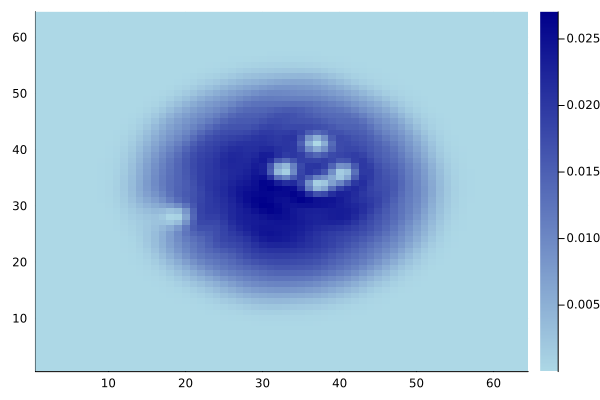

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)